### Parametric Paired_T test ###

- **As we are going to perform parametric T test we have to first check two condition so we can perform well**

***

**Condition 1:Is two group is Paired?**

Analysis: yes we are measure effect on blood pressure medicine in on same group of peoples. hence before_bp and after_bp are linked samples of same group so we can say it is Paired group

***

**Condition 2:for being paramatertic it follows all assumption?**

Assumption 1: check and remove outliers if any from two samples  
Assumption 2: Dependent variable needs to be contineous here dependent variable is (blood pressure difference)  
Assumption 3: Dependent variable need to be in normal bell shape curve  
Assumption 4: Dependent variable needs to be linear  


Analysis : implementation depcits all assumptions are satisfied
***

**After both conditions analysis yes we can choose Parametric Paired_T test**






### Formulate Hypothesis ###

***

**Null hypothesis (H0):** The difference between the pairs follows a symmetric distribution around zero.(before_bp and after_bp mean difference are equal there is no significant difference)  
**Alternative hypothesis (HA):** The difference between the pairs does not follow a symmetric distribution around zero.(before_bp and after_bp mean difference are not equal there is significant difference it is not by chance)

In [1]:
import pandas as pd

df = pd.read_csv("dataset/blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


### Assumption 1 : Check No Outlier###

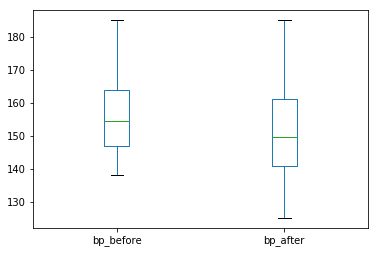

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

df[['bp_before', 'bp_after']].plot(kind='box')
# This saves the plot as a png file
plt.show('boxplot_outliers.png')

### Assumption 3 : Check Normal Distribution ###


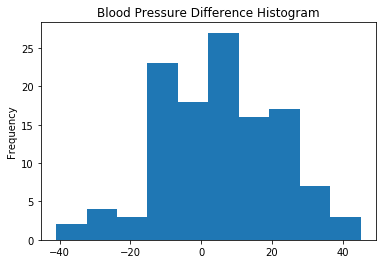

In [5]:
df['bp_difference'] = df['bp_before'] - df['bp_after']

df['bp_difference'].plot(kind='hist', title= 'Blood Pressure Difference Histogram')
#Again, this saves the plot as a png file
plt.savefig('blood pressure difference histogram.png')

### Assumption 4 : Check Linear ###

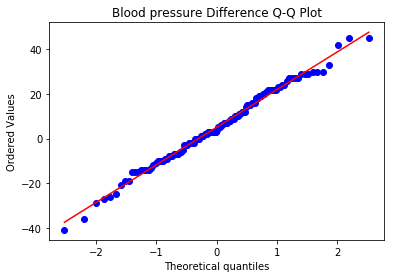

In [7]:
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('blood pressure difference qq plot.png')

### Paired Sample T test ###

In [9]:
stats.ttest_rel(df['bp_before'], df['bp_after'])


Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

** Interpretation of Result **

The findings are statistically significant! One can reject the null hypothesis(for fail to reject null hypothesis it p>0.05 required) in support of the alternative.

Another component needed to report the findings is the degrees of freedom (df). This can be calculated by taking the total number of paired observations and subtracting 1. In our case, df = 120 – 1 = 119.


A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units.